In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [100]:
# load dataset and show the first five sample
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv')

df.head(5)
# Shows top 5 rows of the data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [101]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'})

df.head(5)
# Shows top 5 rows of the data

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [102]:
# describe data

df.describe()
# CustomerID: The customer ID is a unique identifier for each customer.
# Age: The age of the customer.
# AnnualIncome: The annual income of the customer.
# SpendingScore: A score representing the customer's spending habits.
# This kind of table is often used in data analysis to get a quick overview of the distribution of data in a dataset.

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [103]:
# Check for null values in the dataset

df.isnull().sum()
# There is no null values in the dataset

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


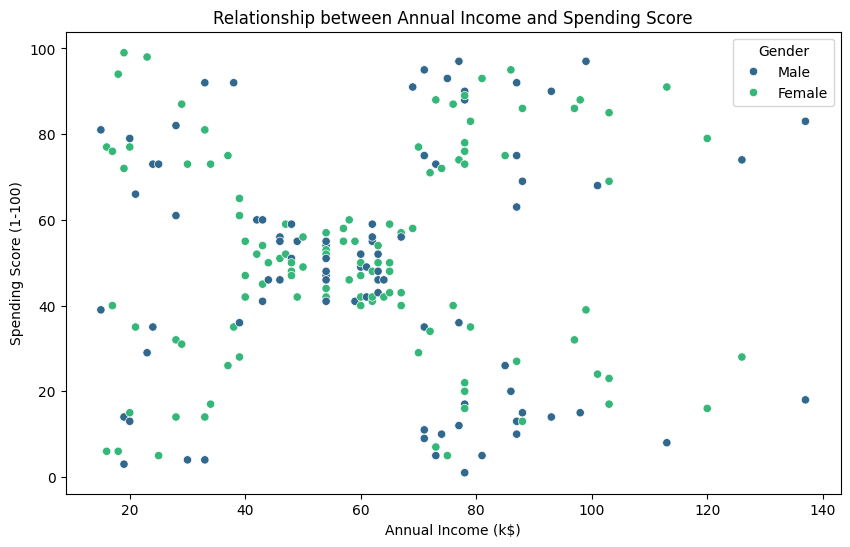

In [104]:
# make an insightful visualization and explain

# Scatter plot of Annual Income vs. Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Gender', palette='viridis')
plt.title("Relationship between Annual Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Gender')

plt.show()
# This scatter plot shows how Spending Score varies across different levels of Annual Income.
# By coloring the points based on Gender, we can also observe any potential gender-based trends in income and spending.

<ipython-input-105-0bdce2749883>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending_by_gender_age = df.groupby(['Gender', 'Age Group'])['SpendingScore'].mean().unstack()


<Figure size 1000x600 with 0 Axes>

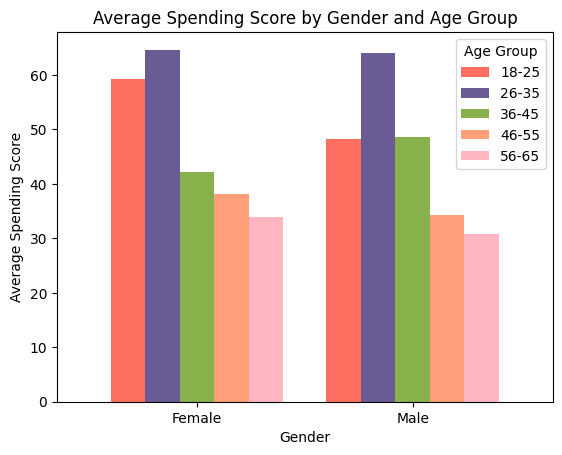

In [105]:
# make an insightful visualization and explain

# Define age groups
df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Calculate the average spending score by gender and age group
avg_spending_by_gender_age = df.groupby(['Gender', 'Age Group'])['SpendingScore'].mean().unstack()

# Bar plot of average Spending Score by Gender and Age Group with unique colors
plt.figure(figsize=(10, 6))
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#FFA07A', '#FFB6C1', '#DEB887', '#20B2AA', '#CD5C5C', '#6495ED', '#FFD700']
avg_spending_by_gender_age.plot(kind='bar', color=colors, width=0.8)

plt.title("Average Spending Score by Gender and Age Group")
plt.xlabel("Gender")
plt.ylabel("Average Spending Score")
plt.xticks(rotation=0)
plt.legend(title="Age Group")

plt.show()
# This bar plot displays the average Spending Score for males and females across different Age Groups.
# Each bar segment represents an age group within a gender, providing a clear view of spending habits by age and gender simultaneously.
# This visualization helps reveal if certain gender and age combinations have higher spending tendencies.

## Data Preprocessing

For this case study, we only use income and spending score

In [106]:
# create new dataframe that consist only annual income and spending score
df = df[['AnnualIncome', 'SpendingScore']]

# Display the first few rows
df.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [107]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=["AnnualIncome", "SpendingScore"])

# Display the first few rows of the scaled data
df_scaled.head()

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [108]:
# get stastical information on the new dataset
df_scaled.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

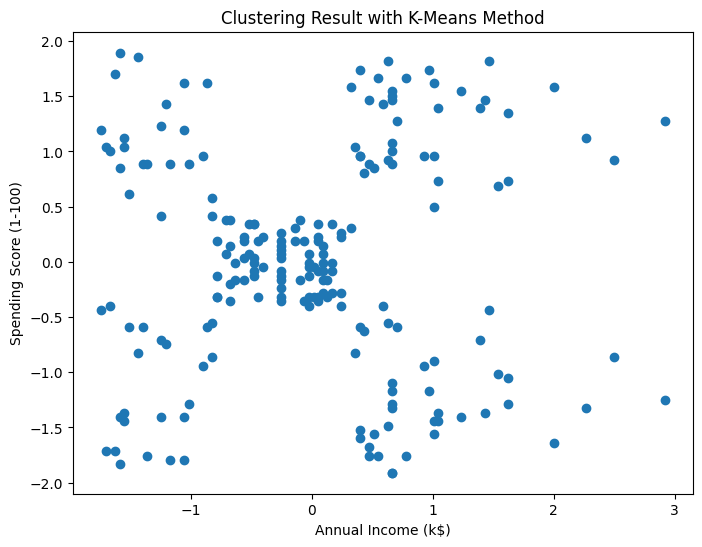

In [109]:
# Visualize the position

plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['AnnualIncome'], df_scaled['SpendingScore'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clustering Result with K-Means Method")
plt.show()

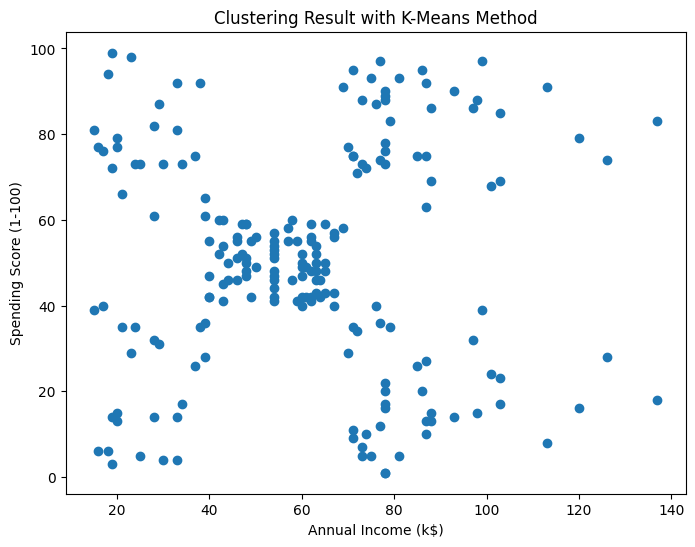

In [110]:
# Visualize the position using the original scale
plt.figure(figsize=(8, 6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clustering Result with K-Means Method")
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [111]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans
sse=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
  kmeans.fit(df_scaled)
  sse.append(kmeans.inertia_)

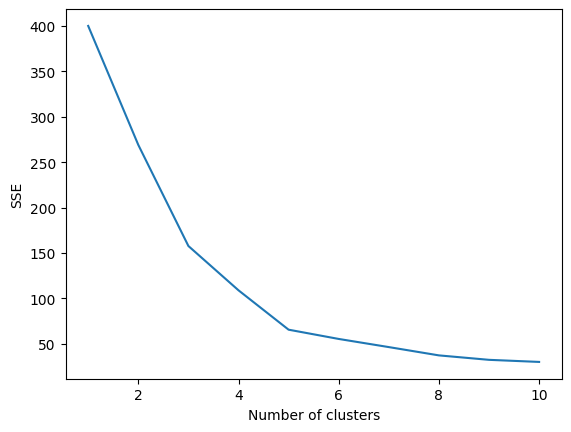

In [112]:
# manually visualize the elbow method using plotlib
plt.plot(range(1,11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [113]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator

kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [114]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

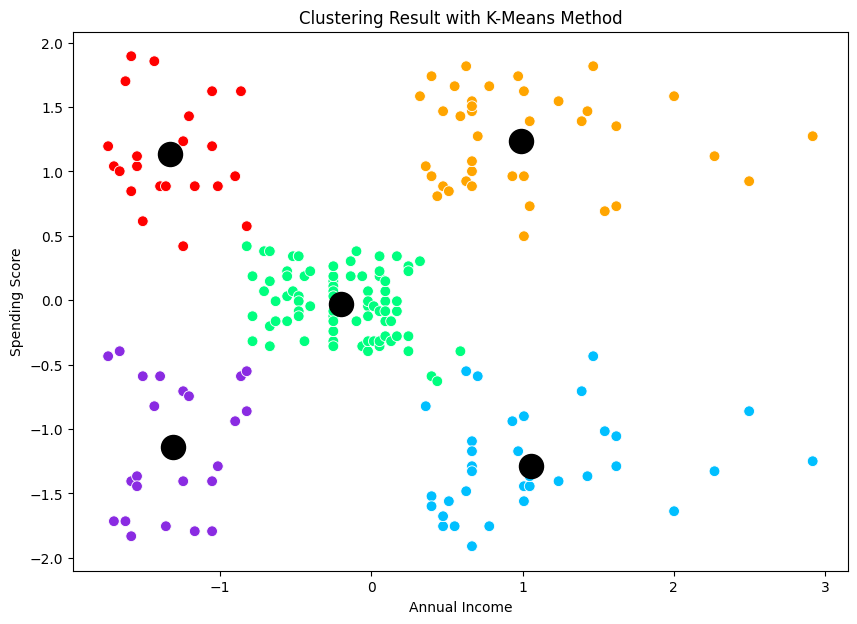

In [115]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))

sns.scatterplot(x="AnnualIncome", y="SpendingScore", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"], legend=None, data=df_scaled, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [116]:
# Inverse transform the scaled data to get the original values
df = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=["AnnualIncome", "SpendingScore"])
df['Cluster'] = y_pred

df.head()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [117]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_pred).agg({
    'SpendingScore': ['mean', 'std', 'min', 'max'],
    'AnnualIncome': ['mean', 'std', 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

SpendingScore                        AnnualIncome                   \
                 mean        std   min   max         mean        std   min   
cluster                                                                      
0           20.913043  13.017167   3.0  40.0    26.304348   7.893811  15.0   
1           79.363636  10.504174  61.0  99.0    25.727273   7.566731  15.0   
2           17.114286   9.952154   1.0  39.0    88.200000  16.399067  70.0   
3           82.128205   9.364489  63.0  97.0    86.538462  16.312485  69.0   
4           49.518519   6.530909  34.0  61.0    55.296296   8.988109  39.0   

                
           max  
cluster         
0         39.0  
1         39.0  
2        137.0  
3        137.0  
4         76.0

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

# **SUMMARY**

Cluster 0 (Blueviolet): This group, characterized by low income and spending, may be budget-conscious or have limited financial resources. Marketing strategies should focus on value-oriented products and promotions.


Cluster 1 (Red): Customers in this group exhibit higher spending habits despite lower income. They could be driven by factors like a desire for status symbols or a tendency to spend beyond their means. Targeted marketing should emphasize affordable but premium products that offer perceived value.


Cluster 2 (Deepskyblue): This group features individuals with high income but moderate spending. They might be financially conservative or prioritize saving over immediate spending. Marketing campaigns should focus on high-value products that offer long-term benefits, such as investments or luxury items with high resale value.


Cluster 3 (Orange): This is a valuable segment characterized by high income and spending, often driven by a desire for luxury goods and experiences. Marketing strategies should leverage premium branding, exclusive offers, and personalized communication to cater to their discerning tastes.


Cluster 4 (Springgreen): This group represents middle-income earners with balanced spending habits. They are likely to be responsive to general marketing efforts and mid-range products that offer good value for money.

<write here>